### Python画月饼，云上过中秋

1、首先我们需要导入画图和数据计算的相关库。

In [18]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.patches import Arc, Circle, Wedge
from matplotlib.collections import PatchCollection
from matplotlib.font_manager import FontProperties

2、为了在图片上显示中文，需要先加载Alibaba-PuHuiTi-Medium字体。

In [19]:
!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Python/miniproject/01_draw_moon_cake/Alibaba-PuHuiTi-Medium.ttf

--2020-09-30 20:13:07--  http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Python/miniproject/01_draw_moon_cake/Alibaba-PuHuiTi-Medium.ttf
Resolving tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)... 47.95.85.21
Connecting to tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)|47.95.85.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9560068 (9.1M) [font/ttf]
Saving to: ‘Alibaba-PuHuiTi-Medium.ttf.1’

100%[======================================>] 9,560,068   18.7MB/s   in 0.5s   

2020-09-30 20:13:07 (18.7 MB/s) - ‘Alibaba-PuHuiTi-Medium.ttf.1’ saved [9560068/9560068]



3、然后设置3个变量，这3个变量的用途到后面会有解释：

In [20]:
length = 20  
R = 3**0.5*length/(3**0.5*cos(pi/12)-sin(pi/12))
r = 2*sin(pi/12)*R/3**0.5

4、接下来我们要画弧线，弧线是月饼边缘的花纹：

In [21]:
arc1 = Arc([0, length], width=2*r, height=2*r, 
           angle=0, theta1=30, theta2=150, ec='orange', linewidth=4)  ##ec为线条颜色，可以自由替换

5、其中 [0, length] 是这个Arc弧线的圆心，因为这个Arc类是一个椭圆形的一部分，所以其包含圆心、横轴、纵轴等参数，length变量就是arc1圆心的纵坐标，width=2*r 和 height=2*r 就说明这个椭圆的纵轴和横轴长度相等，其是一个圆，而不是椭圆，变量 r 就是这个圆的半径。angle=0 就是我们不需要对这个圆进行旋转，theta1=30 和 theta2=150 是指明这个弧线的起始角度和终止角度，这里的角度分别是30度和150度。而 ec='orange' 和linewidth=4 分别指边线的颜色和线条宽度，颜色我们设为橙色，宽度为4。而这些弧线的效果图如图2所示，在图中笔者标出了arc1、arc5和arc9这3条弧线的位置，所有弧线按照逆时针方向排列。这些位置大同小异，大家只要计算好其各自的位置参数就行，这里就不再赘述了。

接下来我们要画剩下的11条弧线

In [22]:
#arc1 = Arc([0, length], width=2*r, height=2*r, angle=0, theta1=30, theta2=150, ec='orange', linewidth=4)
arc2 = Arc([-length/2, length/2*3**0.5], width=2*r, height=2*r, 
           angle=0, theta1=60, theta2=180, ec='orange', linewidth=4)
arc3 = Arc([-length/2*3**0.5, length/2], width=2*r, height=2*r, 
           angle=0, theta1=90, theta2=210, ec='orange', linewidth=4)
arc4 = Arc([-length, 0], width=2*r, height=2*r, angle=0, theta1=120, theta2=240, ec='orange', linewidth=4)
arc5 = Arc([-length/2*3**0.5, -length/2], width=2*r, height=2*r, 
           angle=0, theta1=150, theta2=270, ec='orange', linewidth=4)
arc6 = Arc([-length/2, -length/2*3**0.5], width=2*r, height=2*r,
           angle=0, theta1=180, theta2=300, ec='orange', linewidth=4)
arc7 = Arc([0, -length], width=2*r, height=2*r, angle=0, theta1=210, theta2=330, ec='orange', linewidth=4)
arc8 = Arc([length/2, -length/2*3**0.5], width=2*r, height=2*r,
           angle=0, theta1=240, theta2=360, ec='orange', linewidth=4)
arc9 = Arc([length/2*3**0.5, -length/2], width=2*r, height=2*r,
           angle=0, theta1=270, theta2=390, ec='orange', linewidth=4)
arc10 = Arc([length, 0], width=2*r, height=2*r, angle=0, theta1=300, theta2=420, ec='orange', linewidth=4)
arc11 = Arc([length/2*3**0.5, length/2], width=2*r, height=2*r,
            angle=0, theta1=330, theta2=450, ec='orange', linewidth=4)
arc12 = Arc([length/2, length/2*3**0.5], width=2*r, height=2*r,
            angle=0, theta1=0, theta2=120, ec='orange', linewidth=4)

6、然后我们再画一个圆，这个圆是月饼的主体部分，其圆心和整个月饼的中心是重合的，圆心位置我们选在了坐标原点，代码如下：

In [23]:
circle = Circle((0,0), R, ec='orange', fc='white', linewidth=4) ##ec为线条颜色，fc为填充颜色,可以自由替换

7、这里变量R就是这个大圆的半径，边线颜色（ec）设置为橙色，表面颜色设为白色。
接下来我们再画上一些花纹，这些花纹主要由8个扇形组成，其中有4个大的扇形和4个小的扇形，我们先画一个，代码如下：

In [24]:
wedge1 = Wedge([-2, 2], R-5, 90, 180,
               ec='orange', fc=r'white', linewidth=4) ##ec为线条颜色，fc为填充颜色,可以自由替换

8、其中[-2, 2]是这个Wedge所代表的圆的圆心，R-5 是其半径，90 和180分别代表起始和终止角度，ec、fc和linewidth这些都和前面Arc类的用法相似，这8个扇形的效果图如图4所示。在图中笔者标出了wedge1、wedge2、wedge5和wedge6的位置，所有扇形按照逆时针方向放置。
了解以后我们把剩下的部分给画完

In [25]:
wedge2 = Wedge([-5, 5], R-12, 90, 180, ec='orange',
               fc=r'white', linewidth=4)
wedge3 = Wedge([-2, -2], R-5, 180, 270, ec='orange', 
               fc=r'white', linewidth=4)
wedge4 = Wedge([-5, -5], R-12, 180, 270, ec='orange', 
               fc=r'white', linewidth=4)
wedge5 = Wedge([2, -2], R-5, 270, 360, ec='orange', 
               fc=r'white', linewidth=4)
wedge6 = Wedge([5, -5], R-12, 270, 360, ec='orange',
               fc=r'white', linewidth=4)
wedge7 = Wedge([2, 2], R-5, 0, 90, ec='orange', 
               fc=r'white', linewidth=4)
wedge8 = Wedge([5, 5], R-12, 0, 90, ec='orange',
               fc=r'white', linewidth=4)

9、最后我们再把自己取好的名称加上，因为代码不多，所以把剩余所有代码都写在这里：

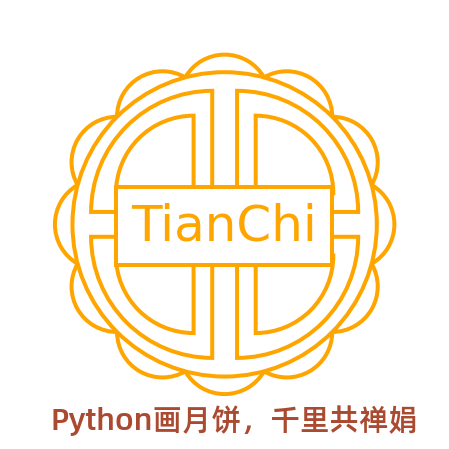

In [26]:
art_list = [arc1, arc2, arc3, arc4, arc5, arc6, arc7, arc8, arc9, arc10, arc11, arc12]
art_list.extend([circle, wedge1, wedge2, wedge3, wedge4, wedge5, wedge6, wedge7, wedge8])
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
for a in art_list:
    ax.add_patch(a)
    
plt.axis('off')
font_set = FontProperties(fname=r"Alibaba-PuHuiTi-Medium.ttf", size=12) ##可以自由下载字体使用
plt.text(-15, -2.5, 'TianChi', bbox=dict(boxstyle='square', fc="w", ec='orange', linewidth=4),  fontsize=50, color='orange') ##ec为线条颜色，color为字体颜色,可以自由替换
plt.text(-28, -33, 'Python画月饼，千里共禅娟',fontproperties=font_set, fontsize=30, color='#aa4a30')
plt.ylim([-35, 35])
plt.xlim([-35, 35])

plt.show()

10、art_list是我们设置的一个list变量，里面放有arc1到arc12这12个图形，然后再把circle以及8个扇形都加进去。ax.set_aspect('equal')是设置整个图形x轴和y轴同比例，for a in art_list: ax.add_patch(a) 是把art_list中所有图形加入到画布当中。而plt.text这行代码中，-18和-2.5是这个text的左下角的坐标，fontfamily 和 fontsize 分别是文字的字体和大小，bbox 是设置text边框的格式，这些参数也都和前面讲过的很多参数差不多，这里不再赘述。plt.ylim 和plt.xlim是设置整个画布的坐标范围。最终效果如图1所示。

当然我们也可以改变图片的颜色，比如设置成蓝色的，这个完全可以根据个人爱好而定。

本案例代码来自：Crossin的编程教室</br>
作者：tyran